In [1]:
import pandas as pd
import numpy as np
import buckaroo
from dataprep.eda import create_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import gc           # garbage collector
import tracemalloc #track memory usage

In [2]:
tracemalloc.start()             #start tracking memory usage
data=pd.read_csv("Data\Base.csv") 

def memory_usage():
    (current_usage,peak_usage)=tracemalloc.get_traced_memory()
    print(f"current_usage {current_usage/1e6} MB \npeak_usage {peak_usage/1e6} MB")
    
memory_usage()

current_usage 256.122361 MB 
peak_usage 872.16664 MB


In [3]:
data

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

In [4]:
data.duplicated().sum() # get sum of duplicated rows

0

#### Drop duplicates

In [5]:
rduplicate_data=data.drop_duplicates(keep="first") # drop duplicate rows and keep the first occured

memory_usage()

current_usage 559.735078 MB 
peak_usage 872.16664 MB


### Change category to numeric

In [6]:
codes,_=pd.factorize(rduplicate_data["device_os"]) #get category codes
device_os_category= {category:value for value, category in zip(codes,rduplicate_data["device_os"])} # get category codes with labels
print(device_os_category)
rduplicate_data["device_os"]=codes # change categories to codes
rduplicate_data["device_os"]

{'windows': 0, 'other': 1, 'linux': 2, 'macintosh': 3, 'x11': 4}


0         0
1         0
2         1
3         2
4         3
         ..
999995    2
999996    0
999997    1
999998    0
999999    2
Name: device_os, Length: 1000000, dtype: int64

In [7]:
codes,_=pd.factorize(rduplicate_data["payment_type"]) #get category codes
payment_type_category= {category:value for value, category in zip(codes,rduplicate_data["payment_type"])} # get category codes with labels
print(payment_type_category)
rduplicate_data["payment_type"]=codes # change categories to codes
rduplicate_data["payment_type"]

{'AA': 0, 'AB': 1, 'AC': 2, 'AD': 3, 'AE': 4}


0         0
1         1
2         2
3         1
4         1
         ..
999995    1
999996    2
999997    0
999998    0
999999    0
Name: payment_type, Length: 1000000, dtype: int64

In [8]:
codes,_=pd.factorize(rduplicate_data["employment_status"]) #get category codes
employment_status_category= {category:value for value, category in zip(codes,rduplicate_data["employment_status"])} # get category codes with labels
print(employment_status_category)
rduplicate_data["employment_status"]=codes # change categories to codes
rduplicate_data["employment_status"]

{'CA': 0, 'CB': 1, 'CC': 2, 'CD': 3, 'CE': 4, 'CF': 5, 'CG': 6}


0         0
1         0
2         1
3         0
4         0
         ..
999995    0
999996    2
999997    5
999998    0
999999    0
Name: employment_status, Length: 1000000, dtype: int64

In [9]:
codes,_=pd.factorize(rduplicate_data["housing_status"]) #get category codes
housing_status_category= {category:value for value, category in zip(codes,rduplicate_data["housing_status"])} # get category codes with labels
print(housing_status_category)
rduplicate_data["housing_status"]=codes # change categories to codes
rduplicate_data["housing_status"]

{'BA': 0, 'BB': 1, 'BC': 2, 'BD': 3, 'BE': 4, 'BF': 5, 'BG': 6}


0         0
1         0
2         0
3         0
4         0
         ..
999995    2
999996    2
999997    2
999998    0
999999    4
Name: housing_status, Length: 1000000, dtype: int64

In [10]:
codes,_=pd.factorize(rduplicate_data["source"]) #get category codes
source_category= {category:value for value, category in zip(codes,rduplicate_data["source"])} # get category codes with labels
print(source_category)
rduplicate_data["source"]=codes # change categories to codes
rduplicate_data["source"]

{'INTERNET': 0, 'TELEAPP': 1}


0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: source, Length: 1000000, dtype: int64

In [11]:
sum(rduplicate_data.isna().sum()) # na values

0

In [12]:
sum(rduplicate_data.isnull().sum()) # na values

0

In [13]:
rduplicate_data

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

### category and non category columns

In [14]:
columns=rduplicate_data.columns #columns
category_columns=[]
non_category_columns=[]

for column in columns:
    categories=len(set(rduplicate_data[column])) #no of categories
    if categories<=50:                            #if different values less than or equal to 50 classify it as category
        category_columns.append(column)
    else:
        non_category_columns.append(column)

print(f'non_category_columns {non_category_columns}, \ncategory_columns {category_columns}')

non_category_columns ['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'credit_risk_score', 'session_length_in_minutes'], 
category_columns ['fraud_bool', 'income', 'customer_age', 'payment_type', 'date_of_birth_distinct_emails_4w', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


<AxesSubplot:>

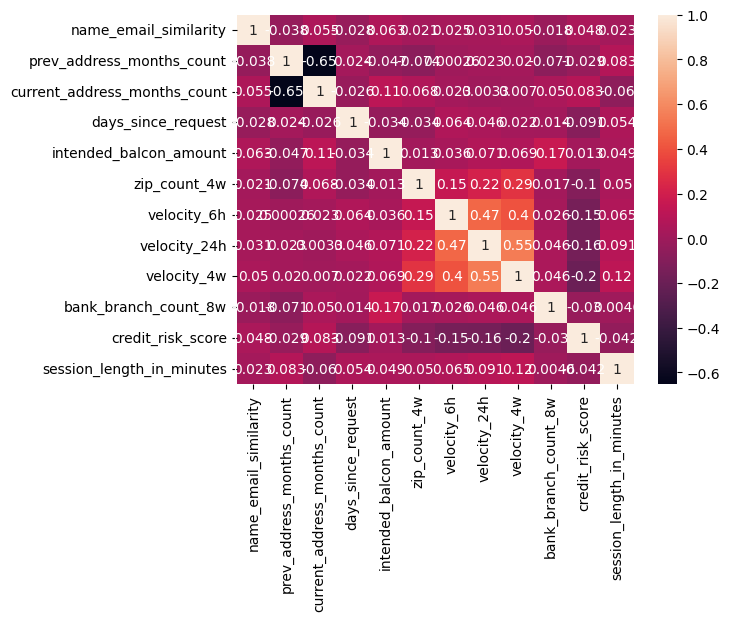

In [15]:
correlation = rduplicate_data[non_category_columns].corr('spearman')
sns.heatmap(correlation,annot=True)

In [16]:
max_min={}
for column in non_category_columns:
    max_min[column]=[round(np.min(rduplicate_data[column])),round(np.max(rduplicate_data[column]))]

max_min


{'name_email_similarity': [0, 1],
 'prev_address_months_count': [-1, 383],
 'current_address_months_count': [-1, 428],
 'days_since_request': [0, 78],
 'intended_balcon_amount': [-16, 113],
 'zip_count_4w': [1, 6700],
 'velocity_6h': [-171, 16716],
 'velocity_24h': [1300, 9507],
 'velocity_4w': [2826, 6995],
 'bank_branch_count_8w': [0, 2385],
 'credit_risk_score': [-170, 389],
 'session_length_in_minutes': [-1, 86]}

In [17]:
data_standard=StandardScaler().fit_transform(rduplicate_data[non_category_columns])

In [18]:
data_standard=pd.DataFrame(data_standard,columns=non_category_columns)

In [19]:
# data_standard.corr('spearman')
# sns.heatmap(data_standard,annot=True)

In [ ]:
memory_usage()

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

 33%|###3      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/2413 [00:00<?, ?it/s]

DataPrep Report
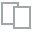
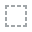
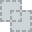
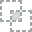
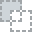
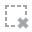
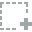
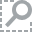
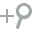
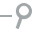
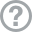
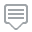
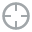
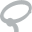
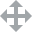
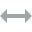
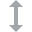
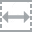
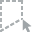
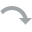
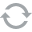
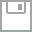
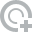
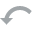
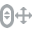
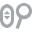
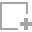
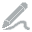
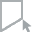
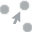
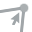
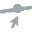

In [20]:
create_report(data_standard)

In [21]:
tracemalloc.stop()